In [1]:
from pathlib import Path
import zipfile
import time

sot_prefix = Path("original_files")

In [2]:
from collections import Counter
import math

entropy_bits_per_byte = []
entropy_total_bits = []
entropy_min_bytes = []
entropy_min_mb = []

for idx in range(11):
    filename = Path(f"redundancy_{idx}0")
    data = (sot_prefix / filename.with_suffix(".txt")).read_bytes()
    n = len(data)
    if n == 0:
        ent = 0.0
    else:
        freqs = Counter(data)
        probs = (count / n for count in freqs.values())
        ent = -sum(p * math.log2(p) for p in probs)
    total_bits = ent * n
    min_bytes = total_bits / 8
    min_mb = min_bytes / 1024 / 1024

    entropy_bits_per_byte.append(ent)
    entropy_total_bits.append(total_bits)
    entropy_min_bytes.append(min_bytes)
    entropy_min_mb.append(min_mb)

    print(f"{filename}: size={n} B, entropy={ent:.6f} bits/byte, "
          f"lower_bound={min_mb:.6f} MB")

# results available as lists:
# entropy_bits_per_byte, entropy_total_bits, entropy_min_bytes, entropy_min_mb

redundancy_00: size=1048576 B, entropy=6.584905 bits/byte, lower_bound=0.823113 MB
redundancy_10: size=1048576 B, entropy=6.349174 bits/byte, lower_bound=0.793647 MB
redundancy_20: size=1048576 B, entropy=5.939418 bits/byte, lower_bound=0.742427 MB
redundancy_30: size=1048576 B, entropy=5.441114 bits/byte, lower_bound=0.680139 MB
redundancy_40: size=1048576 B, entropy=4.874604 bits/byte, lower_bound=0.609326 MB
redundancy_50: size=1048576 B, entropy=4.250048 bits/byte, lower_bound=0.531256 MB
redundancy_60: size=1048576 B, entropy=3.569378 bits/byte, lower_bound=0.446172 MB
redundancy_70: size=1048576 B, entropy=2.827791 bits/byte, lower_bound=0.353474 MB
redundancy_80: size=1048576 B, entropy=2.017455 bits/byte, lower_bound=0.252182 MB
redundancy_90: size=1048576 B, entropy=1.115617 bits/byte, lower_bound=0.139452 MB
redundancy_100: size=1048576 B, entropy=-0.000000 bits/byte, lower_bound=-0.000000 MB


In [3]:
zipfile_prefix  = Path("zipfile")
zipfile_results = []
zipfile_time    = []
z_prefix        = ".zip"

for idx in range(11):   
    filename = Path(f"redundancy_{idx}0")

    txt_size = len((sot_prefix / filename.with_suffix(".txt")).read_bytes()) / 1024 / 1024

    tic = time.time()
    with zipfile.ZipFile(zipfile_prefix / filename.with_suffix(z_prefix), "w", compression = zipfile.ZIP_DEFLATED, compresslevel = 9) as z:
        z.write(sot_prefix / filename.with_suffix(".txt"))
    tac = time.time()

    z_size = len((zipfile_prefix / filename.with_suffix(z_prefix)).read_bytes()) / 1024 / 1024
    zipfile_results.append(z_size)
    zipfile_time.append(tac - tic)

    print(f"Compressed {filename} in {(tac - tic):.2f} seconds: {txt_size:.2f} MB -> {z_size:.2f} MB")

Compressed redundancy_00 in 0.03 seconds: 1.00 MB -> 0.83 MB
Compressed redundancy_10 in 0.02 seconds: 1.00 MB -> 0.75 MB
Compressed redundancy_20 in 0.02 seconds: 1.00 MB -> 0.67 MB
Compressed redundancy_30 in 0.02 seconds: 1.00 MB -> 0.58 MB
Compressed redundancy_40 in 0.02 seconds: 1.00 MB -> 0.50 MB
Compressed redundancy_50 in 0.01 seconds: 1.00 MB -> 0.42 MB
Compressed redundancy_60 in 0.01 seconds: 1.00 MB -> 0.34 MB
Compressed redundancy_70 in 0.01 seconds: 1.00 MB -> 0.25 MB
Compressed redundancy_80 in 0.01 seconds: 1.00 MB -> 0.17 MB
Compressed redundancy_90 in 0.01 seconds: 1.00 MB -> 0.09 MB
Compressed redundancy_100 in 0.00 seconds: 1.00 MB -> 0.00 MB


In [4]:
import lzma
lzma_prefix  = Path("lzma")
lzma_results = []
lzma_time    = []
z_prefix     = ".zx"

for idx in range(11):   
    filename = Path(f"redundancy_{idx}0")

    txt_size = len((sot_prefix / filename.with_suffix(".txt")).read_bytes()) / 1024 / 1024

    tic = time.time()
    d = lzma.compress((sot_prefix / filename.with_suffix(".txt")).read_bytes())
    with open(lzma_prefix / filename.with_suffix(z_prefix), "wb") as f:
        f.write(d)
    tac = time.time()

    z_size = len((lzma_prefix / filename.with_suffix(z_prefix)).read_bytes()) / 1024 / 1024
    lzma_results.append(z_size)
    lzma_time.append(tac - tic)

    print(f"Compressed {filename} in {(tac - tic):.2f} seconds: {txt_size:.2f} MB -> {z_size:.2f} MB")

Compressed redundancy_00 in 0.16 seconds: 1.00 MB -> 0.84 MB
Compressed redundancy_10 in 0.14 seconds: 1.00 MB -> 0.76 MB
Compressed redundancy_20 in 0.13 seconds: 1.00 MB -> 0.67 MB
Compressed redundancy_30 in 0.11 seconds: 1.00 MB -> 0.59 MB
Compressed redundancy_40 in 0.09 seconds: 1.00 MB -> 0.50 MB
Compressed redundancy_50 in 0.08 seconds: 1.00 MB -> 0.42 MB
Compressed redundancy_60 in 0.07 seconds: 1.00 MB -> 0.34 MB
Compressed redundancy_70 in 0.05 seconds: 1.00 MB -> 0.25 MB
Compressed redundancy_80 in 0.04 seconds: 1.00 MB -> 0.17 MB
Compressed redundancy_90 in 0.02 seconds: 1.00 MB -> 0.08 MB
Compressed redundancy_100 in 0.01 seconds: 1.00 MB -> 0.00 MB


In [5]:
import gzip
gzi_prefix   = Path("gzip")
gzip_results = []
gzip_time    = []
z_prefix     = ".gz"

for idx in range(11):
    filename = Path(f"redundancy_{idx}0")

    txt_size = len((sot_prefix / filename.with_suffix(".txt")).read_bytes()) / 1024 / 1024

    tic = time.time()
    with gzip.open(gzi_prefix / filename.with_suffix(z_prefix), "wb", compresslevel = 9) as f:
        f.write((sot_prefix / filename.with_suffix(".txt")).read_bytes())
    tac = time.time()

    z_size = len((gzi_prefix / filename.with_suffix(z_prefix)).read_bytes()) / 1024 / 1024
    gzip_results.append(z_size)
    gzip_time.append(tac - tic)

    print(f"Compressed {filename} in {(tac - tic):.2f} seconds: {txt_size:.2f} MB -> {z_size:.2f} MB")

Compressed redundancy_00 in 0.02 seconds: 1.00 MB -> 0.83 MB
Compressed redundancy_10 in 0.02 seconds: 1.00 MB -> 0.75 MB
Compressed redundancy_20 in 0.02 seconds: 1.00 MB -> 0.67 MB
Compressed redundancy_30 in 0.02 seconds: 1.00 MB -> 0.58 MB
Compressed redundancy_40 in 0.02 seconds: 1.00 MB -> 0.50 MB
Compressed redundancy_50 in 0.01 seconds: 1.00 MB -> 0.42 MB
Compressed redundancy_60 in 0.01 seconds: 1.00 MB -> 0.34 MB
Compressed redundancy_70 in 0.01 seconds: 1.00 MB -> 0.25 MB
Compressed redundancy_80 in 0.01 seconds: 1.00 MB -> 0.17 MB
Compressed redundancy_90 in 0.00 seconds: 1.00 MB -> 0.09 MB
Compressed redundancy_100 in 0.00 seconds: 1.00 MB -> 0.00 MB


In [6]:
import bz2
bz2_prefix   = Path("bz2")
bz2_results  = []
bz2_time     = []
z_prefix     = ".bz2"

for idx in range(11):
    filename = Path(f"redundancy_{idx}0")

    txt_size = len((sot_prefix / filename.with_suffix(".txt")).read_bytes()) / 1024 / 1024

    tic = time.time()
    d = bz2.compress((sot_prefix / filename.with_suffix(".txt")).read_bytes(), compresslevel = 9)
    with open(bz2_prefix / filename.with_suffix(z_prefix), "wb") as f:
        f.write(d)
    tac = time.time()

    z_size = len((bz2_prefix / filename.with_suffix(z_prefix)).read_bytes()) / 1024 / 1024
    bz2_results.append(z_size)
    bz2_time.append(tac - tic)

    print(f"Compressed {filename} in {(tac - tic):.2f} seconds: {txt_size:.2f} MB -> {z_size:.2f} MB")

Compressed redundancy_00 in 0.05 seconds: 1.00 MB -> 0.83 MB
Compressed redundancy_10 in 0.05 seconds: 1.00 MB -> 0.75 MB
Compressed redundancy_20 in 0.05 seconds: 1.00 MB -> 0.67 MB
Compressed redundancy_30 in 0.05 seconds: 1.00 MB -> 0.58 MB
Compressed redundancy_40 in 0.08 seconds: 1.00 MB -> 0.50 MB
Compressed redundancy_50 in 0.06 seconds: 1.00 MB -> 0.42 MB
Compressed redundancy_60 in 0.05 seconds: 1.00 MB -> 0.33 MB
Compressed redundancy_70 in 0.04 seconds: 1.00 MB -> 0.25 MB
Compressed redundancy_80 in 0.03 seconds: 1.00 MB -> 0.17 MB
Compressed redundancy_90 in 0.02 seconds: 1.00 MB -> 0.08 MB
Compressed redundancy_100 in 0.01 seconds: 1.00 MB -> 0.00 MB


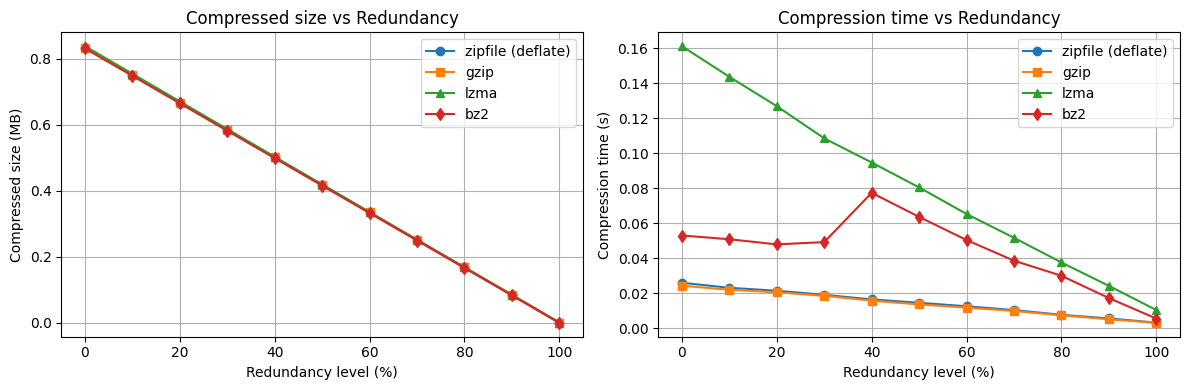

In [7]:
import matplotlib.pyplot as plt

levels = [x * 10 for x in range(11)]  # 0, 10, ..., 100

plt.figure(figsize=(12, 4))

# Compressed sizes
plt.subplot(1, 2, 1)
plt.plot(levels, zipfile_results, '-o', label='zipfile (deflate)')
plt.plot(levels, gzip_results, '-s', label='gzip')
plt.plot(levels, lzma_results, '-^', label='lzma')
plt.plot(levels, bz2_results, '-d', label='bz2')
plt.xlabel('Redundancy level (%)')
plt.ylabel('Compressed size (MB)')
plt.title('Compressed size vs Redundancy')
plt.grid(True)
plt.legend()

# Compression times
plt.subplot(1, 2, 2)
plt.plot(levels, zipfile_time, '-o', label='zipfile (deflate)')
plt.plot(levels, gzip_time, '-s', label='gzip')
plt.plot(levels, lzma_time, '-^', label='lzma')
plt.plot(levels, bz2_time, '-d', label='bz2')
plt.xlabel('Redundancy level (%)')
plt.ylabel('Compression time (s)')
plt.title('Compression time vs Redundancy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()